In [61]:
#Preparetion for the project part I
from sklearn.datasets import fetch_20newsgroups 
import string
import re
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import random
random.seed(42)
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_en = stopwords.words('english')
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
from pickle import dump
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from nltk.corpus import wordnet as wn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn import svm, datasets
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn import svm, datasets
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import wordnet
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [64]:
#Preparetion for the project part II
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self  

def label_transform(any_dataset):
    Y_label = []
    dataset_range = range(len(any_dataset.data))
    for y in dataset_range:
        if "rec" in any_dataset.filenames[y]: Y_label.append(1)
        elif "comp" in any_dataset.filenames[y]: Y_label.append(0)
    return Y_label     

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)


Q1

In [3]:
# Q1 


<class 'sklearn.utils.Bunch'>
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


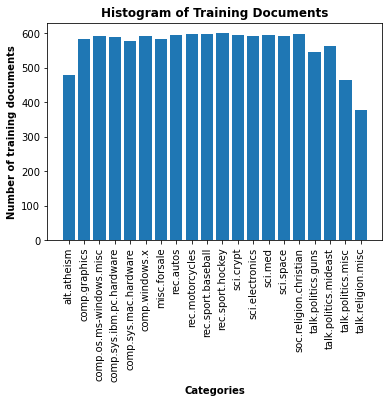

In [4]:
newsgroups = fetch_20newsgroups(subset = 'train') 
number_docs = [];
title = list(newsgroups.target_names)
print(type(newsgroups))
print(newsgroups.target_names)
for i in title:
    news_groups = fetch_20newsgroups(subset = 'train',categories = [i]) 
    number_docs.append(len(news_groups.data))

plt.bar(title, number_docs ,tick_label=title) 
plt.xticks(rotation='vertical')
plt.xlabel("Categories", fontweight='bold')
plt.ylabel("Number of training documents", fontweight='bold')
plt.title("Histogram of Training Documents", fontweight='bold')
plt.show()

Q2

In [5]:
print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of stop_words_en:\t\t %s" % len(stop_words_en))

from string import punctuation
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print("# of combined_stopwords:\t %s" % len(combined_stopwords))

# of stop_words_skt:		 318
# of stop_words_en:		 179
# of punctuation:		 32
# of combined_stopwords:	 410


In [6]:


categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = 42)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = 42)

print(len(train_dataset.target))
print(len(test_dataset.target))
print(train_dataset.data[0])
print(test_dataset.data[0])


4732
3150
From: sac@asdi.saic.com (Steve A. Conroy x6172)
Subject: Re: Darrrrrrrrryl
Organization: SAIC
Lines: 33

In article <mssC5KCru.5Ip@netcom.com>, mss@netcom.com (Mark Singer) writes:
|> 
|> 
|> The media is beating the incident at Dodger Stadium on Wednesday to
|> death, but I haven't seen anything in rsb yet.
|> 
|> Gerald Perry of the Cardinals pinch hit in the eighth inning with two
|> on and his club down by a run.  He stroked a line drive into the
|> right field corner.  The ball cleared the three-foot high fence and
|> went into the crowd.  Darryl, racing over from right center, got to
|> the spot in time to reach his glove up over the short fence, but he
|> missed the ball.  A fan sitting in the front row, wearing a mitt,
|> reached up and caught the ball.  Home run.
|> 
|> Now I've seen the replay several times and I have concluded that
|> Darryl missed the ball, and that the fan's glove was essentially
|> behind Darryl's.  Several Dodger fans with seats in the immediat

In [7]:

analyzer = CountVectorizer().build_analyzer()



nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
# min_dfs = range(1,5)
# for min_df in min_dfs:
#     count_vect1 = CountVectorizer(min_df=min_df,analyzer=stem_rmv_punc, stop_words='english')
#     X_train_counts1 = count_vect1.fit_transform(train_dataset.data)
#     print(X_train_counts1)
#     print(X_train_counts1.shape)

count_vect2 = CountVectorizer(min_df=3,analyzer=stem_rmv_punc, stop_words='english')
X_train_counts2 = count_vect2.fit_transform(train_dataset.data)
print(type(X_train_counts2))
print(X_train_counts2.shape)

X_test_counts2 = count_vect2.transform(test_dataset.data)
print(type(X_test_counts2))
print(X_test_counts2.shape)

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'scipy.sparse.csr.csr_matrix'>
(4732, 16292)
<class 'scipy.sparse.csr.csr_matrix'>
(3150, 16292)


In [8]:

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts2) 
X_test_tfidf = tfidf_transformer.transform(X_test_counts2) 
# print(type(X_train_counts2))
# print(X_train_counts2.shape)
# print(type(X_train_tfidf))
# print(X_train_tfidf.shape)
# print(type(X_test_tfidf))
# print(X_test_tfidf.shape)
# print('-' * 20)
# print(X_train_counts2.toarray()[:30,:5])
# print('-' * 20)
# print(X_train_tfidf.toarray()[:30,:5]) 
# print('-' * 20)
# print(X_test_tfidf.toarray()[:30,:5]) 

Q3

In [9]:


svd = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced = svd.fit_transform(X_train_tfidf)
X_test_reduced = svd.transform(X_test_tfidf)
print(type(X_train_reduced))
print(X_train_reduced.shape)
print(type(X_test_reduced))
print(X_test_reduced.shape)

V = svd.components_
print(type(V))
print(V.shape)

print(np.sum(np.array(X_train_tfidf - X_train_reduced.dot(V))**2))

<class 'numpy.ndarray'>
(4732, 50)
<class 'numpy.ndarray'>
(3150, 50)
<class 'numpy.ndarray'>
(50, 16292)
4107.971183106478


In [10]:


model = NMF(n_components=50, init='random', random_state=42) 
W_train = model.fit_transform(X_train_tfidf) 
W_test = model.transform(X_test_tfidf)
print(type(W_train))
print(W_train.shape) 
print(type(W_test))
print(W_test.shape)

H = model.components_ 
print(type(H))
print(H.shape)

print(np.sum(np.array(X_train_tfidf - W_train.dot(H))**2))

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


<class 'numpy.ndarray'>
(4732, 50)
<class 'numpy.ndarray'>
(3150, 50)
<class 'numpy.ndarray'>
(50, 16292)
4144.733226773768


Q4

In [11]:



categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = 42)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = 42)






In [12]:
Y_training_label = []
Y_testing_label = []

print(np.unique(train_dataset.target))
print(type(np.unique(train_dataset.target)))
print(train_dataset.target_names)
print(type(train_dataset.target_names))



Y_training_label = label_transform(train_dataset)
Y_testing_label = label_transform(test_dataset)


print(len(Y_training_label))
print(np.unique(Y_training_label))
print(len(Y_testing_label))
print(np.unique(Y_testing_label))



[0 1 2 3 4 5 6 7]
<class 'numpy.ndarray'>
['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
<class 'list'>
4732
[0 1]
3150
[0 1]


SVM HARD: 

svm_hard accuracy: 0.9714285714285714
svm_hard recall: 0.9792452830188679
svm_hard precision: 0.9646840148698885
svm_hard F-1 score: 0.9719101123595505
svm_hard confusion_matrix:
 [[1503   57]
 [  33 1557]]


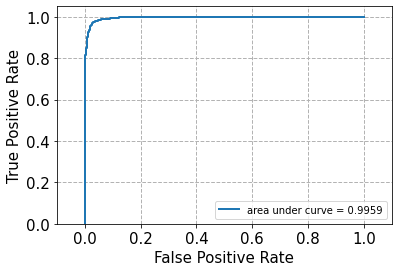

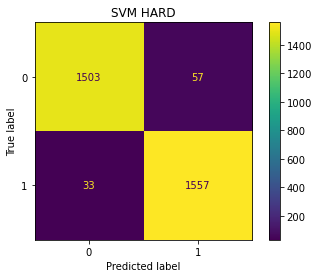

--------------------
SVM SOFT: 

svm_soft accuracy: 0.5047619047619047
svm_soft recall: 1.0
svm_soft precision: 0.5047619047619047
svm_soft F-1 score: 0.6708860759493671
svm_soft confusion_matrix:
 [[   0 1560]
 [   0 1590]]


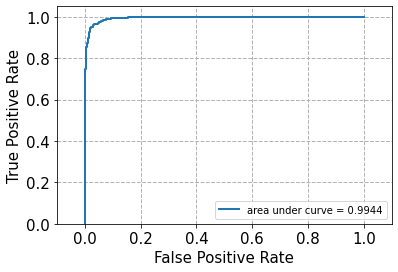

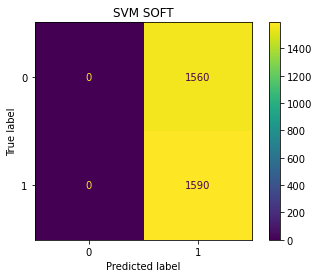

In [13]:


svm_hard = SVC(C=1000, kernel='linear', random_state=42)
svm_soft = SVC(C=0.0001, kernel='linear', random_state=42)
svm_hard.fit(X_train_reduced, Y_training_label)
svm_soft.fit(X_train_reduced, Y_training_label)
svm_hard_score = svm_hard.decision_function(X_test_reduced)
svm_hard_predicted = svm_hard.predict(X_test_reduced)
svm_soft_score = svm_soft.decision_function(X_test_reduced)
svm_soft_predicted = svm_soft.predict(X_test_reduced)
svm_hard_fpr, svm_hard_tpr, svm_hard_t = roc_curve(Y_testing_label,svm_hard_score)
svm_soft_fpr, svm_soft_tpr, svm_soft_t = roc_curve(Y_testing_label,svm_soft_score)


print("SVM HARD: \n")
print('svm_hard accuracy:', accuracy_score(Y_testing_label, svm_hard_predicted))
print('svm_hard recall:', recall_score(Y_testing_label, svm_hard_predicted))
print('svm_hard precision:', precision_score(Y_testing_label, svm_hard_predicted))
print('svm_hard F-1 score:', f1_score(Y_testing_label, svm_hard_predicted))
print('svm_hard confusion_matrix:\n', confusion_matrix(Y_testing_label, svm_hard_predicted))
plot_roc(svm_hard_fpr, svm_hard_tpr)
plot_confusion_matrix(svm_hard, X_test_reduced, Y_testing_label, values_format='d')
plt.title("SVM HARD")
plt.show()


print('-' * 20)

print("SVM SOFT: \n")
print('svm_soft accuracy:', accuracy_score(Y_testing_label, svm_soft_predicted))
print('svm_soft recall:', recall_score(Y_testing_label, svm_soft_predicted))
print('svm_soft precision:', precision_score(Y_testing_label, svm_soft_predicted))
print('svm_soft F-1 score:', f1_score(Y_testing_label, svm_soft_predicted))
print('svm_soft confusion_matrix:\n', confusion_matrix(Y_testing_label, svm_soft_predicted))
plot_roc(svm_soft_fpr, svm_soft_tpr)
plot_confusion_matrix(svm_soft, X_test_reduced, Y_testing_label, values_format='d')
plt.title("SVM SOFT")
plt.show()






In [14]:

# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

range_of_k = range(-3, 3+1)
params = []
for k in range_of_k:
    params.append(10 ** k)

print(type(params))
print(params)

svm_cv = svm.SVC(probability= True)
svm_cv_grid = GridSearchCV(svm_cv, {"C":params}, cv=5)
svm_cv_grid.fit(X_train_reduced, Y_training_label)
print(type(svm_cv_grid.cv_results_))
print(svm_cv_grid.cv_results_)
print(svm_cv_grid.cv_results_['mean_test_score'])
print(type(svm_cv_grid.cv_results_['mean_test_score']))
print("The max mean_test_score is:" + str(max(svm_cv_grid.cv_results_['mean_test_score'])))



C:\Users\hongy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpv7yrbq3n'", use "location='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpv7yrbq3n'" instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'list'>
[0.001, 0.01, 0.1, 1, 10, 100, 1000]
<class 'dict'>
{'mean_fit_time': array([4.46419964, 4.24560018, 1.94539967, 0.98480406, 0.72901158,
       0.71379972, 0.71121645]), 'std_fit_time': array([0.0202005 , 0.03130936, 0.01071766, 0.03195845, 0.00831887,
       0.02168381, 0.01564623]), 'mean_score_time': array([0.16580644, 0.15101171, 0.06840029, 0.0313899 , 0.02260075,
       0.02040005, 0.02059507]), 'std_score_time': array([0.00194026, 0.00141765, 0.00079972, 0.00079726, 0.0010202 ,
       0.00049091, 0.00161585]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.50475185, 0.96832101, 0.97148891, 0.97571278, 0.97993664,
       0.97571278, 0.97043295]), 'split1_test_score': array([0.50475185, 0.96832101, 0.9693

The best parameter is:10
SVM BEST: 

svm_best accuracy: 0.9739682539682539
svm_best recall: 0.980503144654088
svm_best precision: 0.9683229813664597
svm_best F-1 score: 0.974375
svm_best confusion_matrix:
 [[1509   51]
 [  31 1559]]


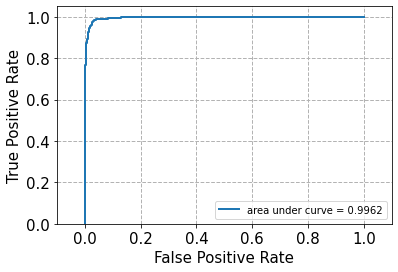

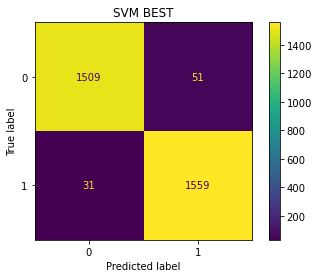

In [15]:


mean_test_score = list(svm_cv_grid.cv_results_['mean_test_score'])
max_index = mean_test_score.index(max(mean_test_score))
max_param = params[max_index]
print("The best parameter is:" + str(max_param))

svm_best = SVC(C= max_param , kernel='linear', random_state=42)

svm_best.fit(X_train_reduced, Y_training_label)

svm_best_score = svm_best.decision_function(X_test_reduced)
svm_best_predicted = svm_best.predict(X_test_reduced)

svm_best_fpr, svm_best_tpr, svm_best_t = roc_curve(Y_testing_label,svm_best_score)



print("SVM BEST: \n")
print('svm_best accuracy:', accuracy_score(Y_testing_label, svm_best_predicted))
print('svm_best recall:', recall_score(Y_testing_label, svm_best_predicted))
print('svm_best precision:', precision_score(Y_testing_label, svm_best_predicted))
print('svm_best F-1 score:', f1_score(Y_testing_label, svm_best_predicted))
print('svm_best confusion_matrix:\n', confusion_matrix(Y_testing_label, svm_best_predicted))
plot_roc(svm_best_fpr, svm_best_tpr)
plot_confusion_matrix(svm_best, X_test_reduced, Y_testing_label, values_format='d')
plt.title("SVM BEST")
plt.show()

Q5


LOG NONE: 

log_none accuracy: 0.9707936507936508
log_none recall: 0.979874213836478
log_none precision: 0.9629171817058096
log_none F-1 score: 0.9713216957605986
log_none confusion_matrix:
 [[1500   60]
 [  32 1558]]


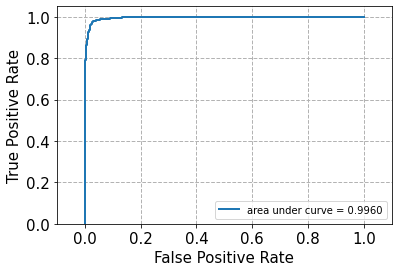

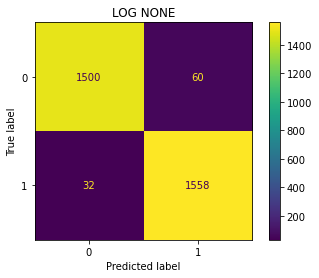

In [16]:


log_none = LogisticRegression(penalty='none', random_state = 42)
log_none.fit(X_train_reduced, Y_training_label)
log_none_score = log_none.decision_function(X_test_reduced)
log_none_predicted = log_none.predict(X_test_reduced)

log_none_fpr, log_none_tpr, log_none_t = roc_curve(Y_testing_label,log_none_score)




print("LOG NONE: \n")
print('log_none accuracy:', accuracy_score(Y_testing_label, log_none_predicted))
print('log_none recall:', recall_score(Y_testing_label, log_none_predicted))
print('log_none precision:', precision_score(Y_testing_label, log_none_predicted))
print('log_none F-1 score:', f1_score(Y_testing_label, log_none_predicted))
print('log_none confusion_matrix:\n', confusion_matrix(Y_testing_label, log_none_predicted))
plot_roc(log_none_fpr, log_none_tpr)
plot_confusion_matrix(log_none, X_test_reduced, Y_testing_label, values_format='d')
plt.title("LOG NONE")
plt.show()



In [17]:

# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

log_l1_range_of_k = range(-3, 3+1)
log_l1_params = []
for k in log_l1_range_of_k:
    log_l1_params.append(10 ** k)

print(type(log_l1_params))
print(log_l1_params)

log_l1_cv = LogisticRegression(penalty= "l1", random_state = 42, solver='liblinear')
log_l1_cv_grid = GridSearchCV(log_l1_cv, {"C":log_l1_params}, cv=5)
log_l1_cv_grid.fit(X_train_reduced, Y_training_label)
print(type(log_l1_cv_grid.cv_results_))
print(log_l1_cv_grid.cv_results_)
print(log_l1_cv_grid.cv_results_['mean_test_score'])
print(type(log_l1_cv_grid.cv_results_['mean_test_score']))
print("The max log_l1_mean_test_score is:" + str(max(log_l1_cv_grid.cv_results_['mean_test_score'])))

C:\Users\hongy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpt14664t7'", use "location='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpt14664t7'" instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'list'>
[0.001, 0.01, 0.1, 1, 10, 100, 1000]
<class 'dict'>
{'mean_fit_time': array([0.00559998, 0.00660033, 0.00779996, 0.01379571, 0.04039469,
       0.04379964, 0.04439969]), 'std_fit_time': array([0.00048978, 0.00049043, 0.00039999, 0.00240526, 0.00787296,
       0.01267123, 0.01141236]), 'mean_score_time': array([0.00040021, 0.00039992, 0.00039997, 0.00039997, 0.00020022,
       0.00040016, 0.00080032]), 'std_score_time': array([0.00049015, 0.0004898 , 0.00048986, 0.00048986, 0.00040045,
       0.0004901 , 0.00040016]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.49524815, 0.87011616, 0.96409715, 0.96832101, 0.97465681,
       0.97571278, 0.97465681]), 'split1_test_score': array([0.49524815, 0.89862724, 0.9662

The best parameter is:10
LOG L1: 

log_l1 accuracy: 0.9707936507936508
log_l1 recall: 0.9792452830188679
log_l1 precision: 0.963490099009901
log_l1 F-1 score: 0.9713038053649408
log_l1 confusion_matrix:
 [[1501   59]
 [  33 1557]]


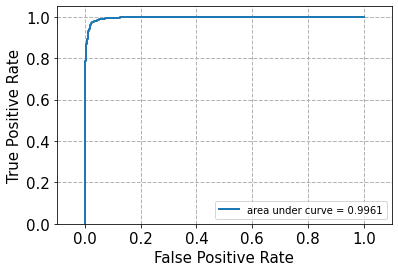

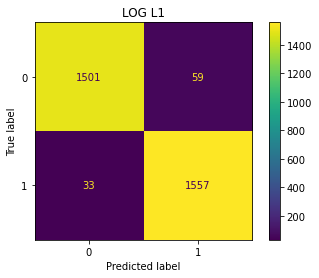

In [18]:


log_l1_mean_test_score = list(log_l1_cv_grid.cv_results_['mean_test_score'])
log_l1_max_index = log_l1_mean_test_score.index(max(log_l1_mean_test_score))
log_l1_max_param = log_l1_params[log_l1_max_index]
print("The best parameter is:" + str(log_l1_max_param))

log_l1 = LogisticRegression(C = log_l1_max_param, penalty='l1', random_state = 42, solver='liblinear')
log_l1.fit(X_train_reduced, Y_training_label)
log_l1_score = log_l1.decision_function(X_test_reduced)
log_l1_predicted = log_l1.predict(X_test_reduced)

log_l1_fpr, log_l1_tpr, log_l1_t = roc_curve(Y_testing_label,log_l1_score)




print("LOG L1: \n")
print('log_l1 accuracy:', accuracy_score(Y_testing_label, log_l1_predicted))
print('log_l1 recall:', recall_score(Y_testing_label, log_l1_predicted))
print('log_l1 precision:', precision_score(Y_testing_label, log_l1_predicted))
print('log_l1 F-1 score:', f1_score(Y_testing_label, log_l1_predicted))
print('log_l1 confusion_matrix:\n', confusion_matrix(Y_testing_label, log_l1_predicted))
plot_roc(log_l1_fpr, log_l1_tpr)
plot_confusion_matrix(log_l1, X_test_reduced, Y_testing_label, values_format='d')
plt.title("LOG L1")
plt.show()



In [19]:

# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

log_l2_range_of_k = range(-3, 3+1)
log_l2_params = []
for k in log_l2_range_of_k:
    log_l2_params.append(10 ** k)

print(type(log_l2_params))
print(log_l2_params)

log_l2_cv = LogisticRegression(penalty= "l2", random_state = 42, max_iter = 8888)
log_l2_cv_grid = GridSearchCV(log_l2_cv, {"C":log_l2_params}, cv=5)
log_l2_cv_grid.fit(X_train_reduced, Y_training_label)
print(type(log_l2_cv_grid.cv_results_))
print(log_l2_cv_grid.cv_results_)
print(log_l2_cv_grid.cv_results_['mean_test_score'])
print(type(log_l2_cv_grid.cv_results_['mean_test_score']))
print("The max log_l2_mean_test_score is:" + str(max(log_l2_cv_grid.cv_results_['mean_test_score'])))

C:\Users\hongy\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpsxz5tiiu'", use "location='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpsxz5tiiu'" instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'list'>
[0.001, 0.01, 0.1, 1, 10, 100, 1000]
<class 'dict'>
{'mean_fit_time': array([0.00400019, 0.0046001 , 0.00600019, 0.01079993, 0.01419959,
       0.02259903, 0.03599982]), 'std_fit_time': array([5.22348936e-07, 4.90018253e-04, 6.32711281e-04, 1.46994426e-03,
       1.72043468e-03, 5.95476697e-03, 1.20824780e-02]), 'mean_score_time': array([0.0006    , 0.00039988, 0.00020003, 0.00040007, 0.00100036,
       0.00080132, 0.00061255]), 'std_score_time': array([4.89901522e-04, 4.89745664e-04, 4.00066376e-04, 4.89979265e-04,
       3.81469727e-07, 4.00676109e-04, 5.00674734e-04]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.51742344, 0.94931362, 0.97360084, 0.97571278, 0.97571278,
       0.97676874, 0.97571278]), 's

The best parameter is:100
LOG L2: 

log_l2 accuracy: 0.9726984126984127
log_l2 recall: 0.9811320754716981
log_l2 precision: 0.9653465346534653
log_l2 F-1 score: 0.9731752963194011
log_l2 confusion_matrix:
 [[1504   56]
 [  30 1560]]


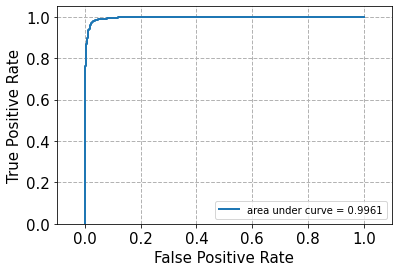

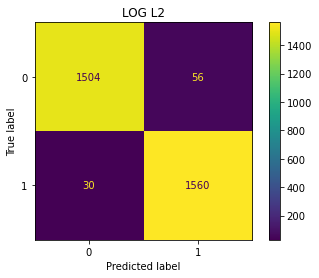

In [20]:


log_l2_mean_test_score = list(log_l2_cv_grid.cv_results_['mean_test_score'])
log_l2_max_index = log_l2_mean_test_score.index(max(log_l2_mean_test_score))
log_l2_max_param = log_l2_params[log_l2_max_index]
print("The best parameter is:" + str(log_l2_max_param))

log_l2 = LogisticRegression(C = log_l2_max_param, penalty='l2', random_state = 42)
log_l2.fit(X_train_reduced, Y_training_label)
log_l2_score = log_l2.decision_function(X_test_reduced)
log_l2_predicted = log_l2.predict(X_test_reduced)

log_l2_fpr, log_l2_tpr, log_l2_t = roc_curve(Y_testing_label,log_l2_score)

print("LOG L2: \n")
print('log_l2 accuracy:', accuracy_score(Y_testing_label, log_l2_predicted))
print('log_l2 recall:', recall_score(Y_testing_label, log_l2_predicted))
print('log_l2 precision:', precision_score(Y_testing_label, log_l2_predicted))
print('log_l2 F-1 score:', f1_score(Y_testing_label, log_l2_predicted))
print('log_l2 confusion_matrix:\n', confusion_matrix(Y_testing_label, log_l2_predicted))
plot_roc(log_l2_fpr, log_l2_tpr)
plot_confusion_matrix(log_l2, X_test_reduced, Y_testing_label, values_format='d')
plt.title("LOG L2")
plt.show()


Q6

GaussianNB: 

nb accuracy: 0.9104761904761904
nb recall: 0.9647798742138365
nb precision: 0.8715909090909091
nb F-1 score: 0.915820895522388
nb confusion_matrix:
 [[1334  226]
 [  56 1534]]


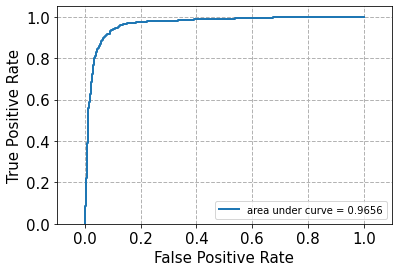

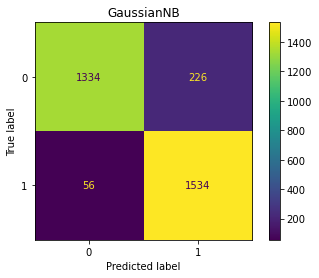

In [21]:


nb = GaussianNB()
nb.fit(X_train_reduced, Y_training_label)
nb_score = nb.predict_proba(X_test_reduced)
nb_predicted = nb.predict(X_test_reduced)

nb_fpr, nb_tpr, nb_t = roc_curve(Y_testing_label,nb_score[:, 1])

print("GaussianNB: \n")
print('nb accuracy:', accuracy_score(Y_testing_label, nb_predicted))
print('nb recall:', recall_score(Y_testing_label, nb_predicted))
print('nb precision:', precision_score(Y_testing_label, nb_predicted))
print('nb F-1 score:', f1_score(Y_testing_label, nb_predicted))
print('nb confusion_matrix:\n', confusion_matrix(Y_testing_label, nb_predicted))
plot_roc(nb_fpr, nb_tpr)
plot_confusion_matrix(nb, X_test_reduced, Y_testing_label, values_format='d')
plt.title("GaussianNB")
plt.show()




Q7

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
memory=memory
)

#N_FEATURES_OPTIONS = [10, 50]
#C_OPTIONS = [0.1, 1, 10]
# REG_OPTIONS = ['l1', 'l2']
# REG_STRENGTH_OPTIONS = [0.1, 1, 10]

param_grid = [ # Try different choices with grid search 
    {
        'vect': [CountVectorizer(min_df=3, stop_words='english'), CountVectorizer(min_df=3, stop_words='english', analyzer=stem_rmv_punc), 
                 CountVectorizer(min_df=5, stop_words='english'), CountVectorizer(min_df=5, stop_words='english', analyzer=stem_rmv_punc)], 
        'reduce_dim': [TruncatedSVD(random_state = 42), NMF(random_state = 42)],
        'reduce_dim__n_components': [50],
        'clf': [SVC(C= max_param, kernel = "linear", random_state = 42), 
                LogisticRegression(C = log_l1_max_param, random_state = 42, penalty = "l1", solver = "liblinear"),
                LogisticRegression(C = log_l2_max_param, random_state = 42, penalty = "l2", max_iter = 8888),
                GaussianNB()]
    }
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid_result = grid.fit(train_dataset.data, Y_training_label)
#rmtree(cachedir)



C:\Users\hongy\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpqyg6mgoz'", use "location='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpqyg6mgoz'" instead.
  


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=3, stop_words='english'), [ 'From: rschmitt@shearson.com (Robert Schmitt)\n'
  'Subject: Re: Please Recommend 3D Graphics Library F\n'
  'Reply-To: rschmitt@shearson.com\n'
  'Organization: Lehman Brothers, Inc.\n'
  'Lines: 9\n'
  '\n'
  'What hardware do plan to run on?  Workstation or PC?  Cost level?\n'
  'Run-time licensing needs?\n'
  '\n'
  'Bob\n'
  '------------------------------------------------------------------\n'
  'Robert A. Schmitt | Applied Derivatives Technology | Lehman Brothers\n'
  'rschmitt@shearson.com\n'
  '\n'
  '\n',
  'From: mori@volga.mfd.cs.fujitsu.co.jp (Tsuyoshi Mori)\n'
  'Subject: I want use DeskJet on System7\n'
  'Organization: FUJITSU.Ltd., Kawasaki, Japan.\n'
  'Lines: 15\n'
  'Di..., 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 9.1s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpqyg6mgoz\joblib\sklearn\pipeline\_fit_transform_one\18664db42b5154793039ed0e97f43e3a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpqyg6mgoz\joblib\sklearn\pipeline\_fit_transform_one\0ffe4075458820dc0fda467e4cd3fd00
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x11019 sparse matrix of type '<class 'numpy.float64'>'
	with 306183 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 7.8s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpqyg6mgoz\joblib\sklearn\pipeline\_fit_transform_one\2107d8ed9cf0f238b96faa6d7b9265b9
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpqyg6mgoz\joblib\sklearn\pipeline\_fit_transform_one\c15be0033ebd6b727ff8a2afcc3da83d
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpqyg6mgoz\joblib\sklearn\pipeline\_fit_transform_one\2058fbc50a4dc81a3ba82ffccb416c90
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpqyg6mgoz\joblib\sklearn\pipeline\_fit_tra

In [23]:
import pandas as pd
pd.DataFrame(grid_result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_reduce_dim__n_components,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.275787,0.064804,0.165006,0.010149,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,"CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.968321,0.974657,0.970402,0.973573,0.979915,0.973374,0.003971,9
1,39.046953,0.918889,9.411678,0.641309,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.969377,0.976769,0.970402,0.975687,0.976744,0.973796,0.003230,7
2,2.111975,0.040910,0.157624,0.009651,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,"CountVectorizer(min_df=5, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.969377,0.972545,0.972516,0.969345,0.977801,0.972317,0.003087,12
3,39.163450,0.781504,9.510797,0.541333,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.972545,0.974657,0.973573,0.973573,0.976744,0.974218,0.001429,5
4,8.115825,2.446229,0.219575,0.004993,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,"CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.956705,0.950370,0.952431,0.945032,0.969345,0.954777,0.008196,24
5,8.170807,1.431951,9.357193,0.422306,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.955649,0.968321,0.953488,0.964059,0.974630,0.963230,0.007860,20
6,6.375608,1.705335,0.203792,0.006165,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,"CountVectorizer(min_df=5, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.956705,0.960929,0.960888,0.957717,0.951374,0.957523,0.003505,23
7,6.761200,1.269291,9.052200,0.442705,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.964097,0.959873,0.952431,0.945032,0.970402,0.958367,0.008866,22
8,0.256824,0.008505,0.134995,0.005235,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=50, random_state=42)",50,"CountVectorizer(min_df=3, stop_words='english')","{'clf': LogisticRegression(C=10, penalty='l1',...",0.972545,0.971489,0.974630,0.971459,0.978858,0.973796,0.002781,6
9,0.228200,0.007574,8.958207,0.470697,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=50, random_state=42)",50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': LogisticRegression(C=10, penalty='l1',...",0.972545,0.975713,0.977801,0.975687,0.976744,0.975698,0.001758,1


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

train_dataset_rmhf = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = 42, remove=('headers', 'footers'))
test_dataset_rmhf = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = 42, remove=('headers', 'footers'))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF

# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
# print(__doc__)
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=42)),
    ('clf', GaussianNB()),
],
memory=memory
)

#N_FEATURES_OPTIONS = [10, 50]
#C_OPTIONS = [0.1, 1, 10]
# REG_OPTIONS = ['l1', 'l2']
# REG_STRENGTH_OPTIONS = [0.1, 1, 10]

param_grid = [ # Try different choices with grid search 
    {
        'vect': [CountVectorizer(min_df=3, stop_words='english'), CountVectorizer(min_df=3, stop_words='english', analyzer=stem_rmv_punc), 
                 CountVectorizer(min_df=5, stop_words='english'), CountVectorizer(min_df=5, stop_words='english', analyzer=stem_rmv_punc)], 
        'reduce_dim': [TruncatedSVD(random_state = 42), NMF(random_state = 42)],
        'reduce_dim__n_components': [50],
        'clf': [SVC(C= max_param, kernel = "linear", random_state = 42), 
                LogisticRegression(C = log_l1_max_param, random_state = 42, penalty = "l1", solver = "liblinear"),
                LogisticRegression(C = log_l2_max_param, random_state = 42, penalty = "l2", max_iter = 8888),
                GaussianNB()]
    }
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']

grid_rmhf = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid_rmhf_result = grid_rmhf.fit(train_dataset_rmhf.data, Y_training_label)
#rmtree(cachedir)


C:\Users\hongy\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpszyflhb0'", use "location='C:\\Users\\hongy\\AppData\\Local\\Temp\\tmpszyflhb0'" instead.


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(CountVectorizer(min_df=3, stop_words='english'), [ 'What hardware do plan to run on?  Workstation or PC?  Cost level?\n'
  'Run-time licensing needs?\n'
  '\n'
  'Bob',
  'I used HP DeskJet with Orange Micros Grappler LS on System6.0.5.\n'
  '\n'
  'But now I update system 6.0.5 to System7 with Kanji-Talk 7.1,\n'
  'then I can not print by my DeskJet.\n'
  '\n'
  'Is the Grappler LS old ?\n'
  'Can I use DeskJet on System7 ?\n'
  '\n'
  'Please tell me how to use DeskJet on System7.\n'
  '\n'
  'Thank you\n',
  'Has anyone used the Number Nine (# 9) Video Graphics adaptor with Windows\n'
  'or Windows NT?  What do you think???',
  'I look at zApp and really liked it. However, I think you should\n'
  'wait for version 2.0 (I think it will b..., 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


_______________________________________________fit_transform_one - 10.5s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\475413b6dd603225de8a8aa9c8742079
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\0e5a26288e7925ee251252deddb8286b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x14537 sparse matrix of type '<class 'numpy.float64'>'
	with 241052 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


_______________________________________________fit_transform_one - 10.5s, 0.2min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\f13f79445f7b9025a27cc5c96e662267
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\d9a75a542e3111f60867e3249ee4b7f8
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x14675 sparse matrix of type '<class 'numpy.float64'>'
	with 241558 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 8.5s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\e6b53910a7b3abc72a5f9a515be40c84
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\7fe7baf52c34ef923a9781e6577edd9b
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x11890 sparse matrix of type '<class 'numpy.float64'>'
	with 211086 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 8.7s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\a3358ee2ccb9e8949a9a41f43c56c69c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\45aea83beac8aa0cb7c85d03da0784c1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x11502 sparse matrix of type '<class 'numpy.float64'>'
	with 210028 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 8.8s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\08922301fa97bba52d2afda5ea07e42c
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\a17e4861845a2b7bfb6d97a251cd6479
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x11665 sparse matrix of type '<class 'numpy.float64'>'
	with 210781 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 7.6s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\423fa8344fe4f1af4e80893ade45cbf6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\f6626c27271718f2a413d0553f5a0654
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x9147 sparse matrix of type '<class 'numpy.float64'>'
	with 222851 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 7.7s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\b1a8233776dae3a6a317538869bd1272
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\2b304ec202aec55c27f57a8f2649762e
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x9180 sparse matrix of type '<class 'numpy.float64'>'
	with 222953 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 8.0s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\7a036f17cce75d20ccdf7d8c953507ba
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\5077412bb25677dd8fb46e006d72e7a6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3785x7181 sparse matrix of type '<class 'numpy.float64'>'
	with 195252 stored elements in Compressed Sparse Row format>, 
[ 0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 6.7s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\8fbae949d34ea4a6782d6a61c903bae6
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\21fa451bab4d5d5b9cedebe54289b8b5
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3785x7063 sparse matrix of type '<class 'numpy.float64'>'
	with 192301 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 6.6s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\c030ba4766835ee65b6d15db5e3b5f6a
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\748a30643234327794cd0179db981709
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x7267 sparse matrix of type '<class 'numpy.float64'>'
	with 195705 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,

C:\Users\hongy\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


________________________________________________fit_transform_one - 6.5s, 0.1min
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\03077297c167efc60e0419e3c1af04e7
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
[Memory]0.1s, 0.0min    : Loading _fit_transform_one from C:\Users\hongy\AppData\Local\Temp\tmpszyflhb0\joblib\sklearn\pipeline\_fit_transform_one\f9eb934057cdfebcd9a67e1590cd01dc
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(NMF(n_components=50, random_state=42), <3786x7317 sparse matrix of type '<class 'numpy.float64'>'
	with 196097 stored elements in Compressed Sparse Row format>, 
[ 1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,

In [25]:
import pandas as pd
pd.DataFrame(grid_rmhf_result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_reduce_dim,param_reduce_dim__n_components,param_vect,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.793929,0.065968,0.130231,0.007627,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,"CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.961985,0.976769,0.972516,0.967230,0.975687,0.970837,0.005530,6
1,30.990421,0.939490,7.455826,0.471061,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.956705,0.971489,0.963002,0.956660,0.972516,0.964074,0.006880,13
2,1.686627,0.080704,0.128180,0.006403,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,"CountVectorizer(min_df=5, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.963041,0.977825,0.971459,0.967230,0.976744,0.971260,0.005604,5
3,31.323583,0.475407,7.504627,0.541924,"SVC(C=10, kernel='linear', random_state=42)","TruncatedSVD(n_components=50, random_state=42)",50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.957761,0.969377,0.964059,0.956660,0.969345,0.963440,0.005454,14
4,8.487400,2.675206,0.172599,0.010423,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,"CountVectorizer(min_df=3, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.936642,0.947202,0.948203,0.943975,0.954545,0.946113,0.005847,25
5,8.509200,1.227922,7.569630,0.577070,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.941922,0.964097,0.952431,0.940803,0.952431,0.950337,0.008483,23
6,6.703003,1.939767,0.169612,0.006168,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,"CountVectorizer(min_df=5, stop_words='english')","{'clf': SVC(C=10, kernel='linear', random_stat...",0.938754,0.960929,0.953488,0.943975,0.961945,0.951818,0.009171,22
7,5.979800,1.345973,7.446200,0.456249,"SVC(C=10, kernel='linear', random_state=42)",NMF(random_state=42),50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': SVC(C=10, kernel='linear', random_stat...",0.942978,0.963041,0.954545,0.946089,0.955603,0.952451,0.007165,21
8,0.211012,0.005845,0.110193,0.005064,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=50, random_state=42)",50,"CountVectorizer(min_df=3, stop_words='english')","{'clf': LogisticRegression(C=10, penalty='l1',...",0.967265,0.975713,0.971459,0.969345,0.982030,0.973162,0.005242,1
9,0.192400,0.004317,7.370616,0.537476,"LogisticRegression(C=10, penalty='l1', random_...","TruncatedSVD(n_components=50, random_state=42)",50,CountVectorizer(analyzer=<function stem_rmv_pu...,"{'clf': LogisticRegression(C=10, penalty='l1',...",0.964097,0.973601,0.968288,0.960888,0.969345,0.967244,0.004387,8


Q9


In [26]:
# from google.colab import drive
# drive.mount('/content/drive')
embeddings_dict = {}
dimension_of_glove = 300
with open("C:/Users/hongy/Downloads/glove/glove.6B.300d.txt", 'r',encoding='utf-8') as f:
    for line in f: 
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [27]:

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace
#cleaned_tweet = clean_text(train_dataset.data[0])

tt = TweetTokenizer()
#ttt= tt.tokenize(cleaned_tweet)
def filtered_stopword(text):
    filtered_words = [word for word in text if word not in stopwords.words('english')]
    return filtered_words

##remove word not in dictionary
def filter_nembeddword(text):
    double_filtered_words = []
    for word in text:
        if word in embeddings_dict:
            double_filtered_words.append(word)
    return double_filtered_words
#data cleaning
filter_train_dataset = []
for i in range(len(train_dataset.data)):
    cleaned_tweet = clean_text(train_dataset.data[i])
    ttt = tt.tokenize(cleaned_tweet)
    filtered_train_words = filtered_stopword(ttt)
    double_filtered_words=filter_nembeddword(filtered_train_words)
    filter_train_dataset.append(double_filtered_words)
print(len(filter_train_dataset))
#print(len(filtered_words))
#print(train_dataset.data[0])

4732


In [28]:
x_train_embeddings_vec=[]
for i in range(len(filter_train_dataset)):
    aa=[]
    a = filter_train_dataset[i]
    b= sum(embeddings_dict[j] for j in filter_train_dataset[i])
    bb=b/len(b)
    x_train_embeddings_vec.append(bb)
filter_test_dataset = []
for i in range(len(test_dataset.data)):
    cleaned_tweet = clean_text(test_dataset.data[i])
    ttt = tt.tokenize(cleaned_tweet)
    filtered_test_words = filtered_stopword(ttt)
    double_filtered_words=filter_nembeddword(filtered_test_words)
    filter_test_dataset.append(double_filtered_words)
x_test_embeddings_vec=[]
for i in range(len(filter_test_dataset)):
    aa=[]
    a = filter_test_dataset[i]
    b= sum(embeddings_dict[j] for j in filter_test_dataset[i])
    bb=b/len(b)
    x_test_embeddings_vec.append(bb)

accuracy: 0.966984126984127


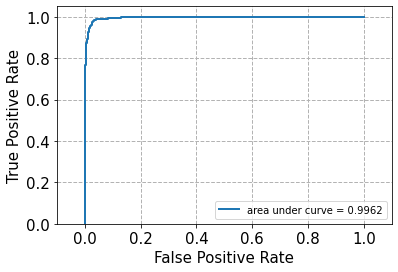

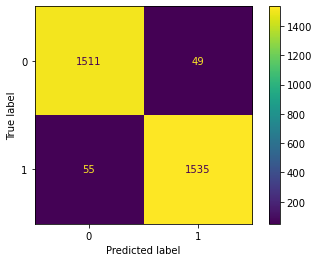

In [29]:
svm_best_q9 = SVC(C= max_param , kernel='linear', random_state=42)
svm_best_q9.fit(x_train_embeddings_vec, Y_training_label)
svm_best_q9score = svm_best_q9.decision_function(x_test_embeddings_vec)
svm_best_q9predicted = svm_best_q9.predict(x_test_embeddings_vec)

svm_best_fpr, svm_best_tpr, svm_best_t = roc_curve(Y_testing_label,svm_best_score)
print('accuracy:', accuracy_score(Y_testing_label, svm_best_q9predicted))
plot_roc(svm_best_fpr, svm_best_tpr)
plot_confusion_matrix(svm_best_q9, x_test_embeddings_vec, Y_testing_label)
plt.show()

Q10


In [30]:
def load_glove(dimension):
    embeddings_dict = {}
    with open("C:/Users/hongy/Downloads/glove/glove.6B.{dimension}d.txt".format(dimension=dimension), 'r',encoding='utf-8') as f:
        for line in f: 
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
    return embeddings_dict
t_t = TweetTokenizer()
embeddings_100_dict=load_glove(100)
embeddings_200_dict=load_glove(200)
embeddings_50_dict=load_glove(50)
embeddings_300_dict=load_glove(300)
thisdict = {
  50: embeddings_50_dict,
  100: embeddings_100_dict,
  200: embeddings_200_dict,
  300: embeddings_300_dict
}
def filter_nembeddword(text,dimension):
    double_filtered_words = []
    for word in text:
        if word in thisdict[dimension]:
            double_filtered_words.append(word)
    return double_filtered_words
filtered_train_words=[]
for i in range(len(train_dataset.data)):
    cleaned_tweet_train = clean_text(train_dataset.data[i])
    ttt_train = t_t.tokenize(cleaned_tweet_train)
    filtered_train_words.append(filtered_stopword(ttt_train))
filtered_test_words=[]
for i in range(len(test_dataset.data)):
    cleaned_tweet_test = clean_text(test_dataset.data[i])
    ttt_test = tt.tokenize(cleaned_tweet_test)
    filtered_test_words.append(filtered_stopword(ttt_test))
def get_x_train(dimension):
    filter_train_dataset = []
    for i in range(len(train_dataset.data)):
        double_filtered_words=filter_nembeddword(filtered_train_words[i],dimension)
        filter_train_dataset.append(double_filtered_words)
    return filter_train_dataset
x_50 = get_x_train(50)
x_100 = get_x_train(100)
x_200 = get_x_train(200)
x_300 = get_x_train(300)


def get_x_test(dimension):
    filter_test_dataset = []
    for i in range(len(test_dataset.data)):
    # cleaned_tweet = clean_text(test_dataset.data[i])
    # ttt = tt.tokenize(cleaned_tweet)
    # filtered_words = filtered_stopword(ttt)
        double_tfiltered_words=filter_nembeddword(filtered_test_words[i],dimension)
        filter_test_dataset.append(double_tfiltered_words)
    return filter_test_dataset
x_te_50 = get_x_test(50)
x_te_100 = get_x_test(100)
x_te_200 = get_x_test(200)
x_te_300 = get_x_test(300)

def get_avg_vec(x,dimension):
    x_embeddings_vec=[]
    for i in range(len(x)):
        a = x[i]
        b= sum(thisdict[dimension][j] for j in x[i])
        bb=b/len(b)
        x_embeddings_vec.append(bb)
    return x_embeddings_vec
x_train_50 = get_avg_vec(x_50,50)
x_train_100 = get_avg_vec(x_100,100)
x_train_200 = get_avg_vec(x_200,200)
x_train_300 = get_avg_vec(x_300,300)
x_test_50 = get_avg_vec(x_te_50,50)
x_test_100 = get_avg_vec(x_te_100,100)
x_test_200 = get_avg_vec(x_te_200,200)
x_test_300=get_avg_vec(x_te_300,300)
svm_50 = SVC(C=10,kernel='linear', random_state=42)
svm_50.fit(x_train_50, Y_training_label)
svm_50_predicted = svm_50.predict(x_test_50)
glove_50_accuracy= accuracy_score(Y_testing_label, svm_50_predicted)

svm_100 = SVC(C=10,kernel='linear', random_state=42)
svm_100.fit(x_train_100, Y_training_label)
svm_100_predicted = svm_100.predict(x_test_100)
glove_100_accuracy= accuracy_score(Y_testing_label, svm_100_predicted)

svm_200 = SVC(C=10,kernel='linear', random_state=42)
svm_200.fit(x_train_200, Y_training_label)
svm_200_predicted = svm_200.predict(x_test_200)
glove_200_accuracy= accuracy_score(Y_testing_label, svm_200_predicted)

svm_300 = SVC(C=10,kernel='linear', random_state=42)
svm_300.fit(x_train_300, Y_training_label)
svm_300_predicted = svm_300.predict(x_test_300)
glove_300_accuracy= accuracy_score(Y_testing_label, svm_300_predicted)
print('glove_50_accuracy: ',glove_50_accuracy)
print('glove_100_accuracy: ',glove_100_accuracy)
print('glove_200_accuracy: ',glove_200_accuracy)
print('glove_300_accuracy: ',glove_300_accuracy)

glove_50_accuracy:  0.9453968253968253
glove_100_accuracy:  0.9558730158730159
glove_200_accuracy:  0.9650793650793651
glove_300_accuracy:  0.966984126984127


Text(0.5, 1.0, 'Dimension vs. Accuracy')

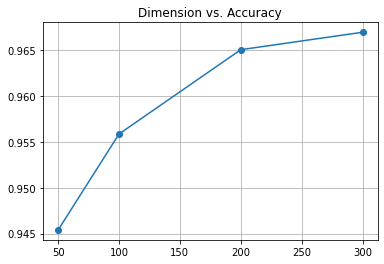

In [40]:
x=[50,100,200,300]
y = [glove_50_accuracy,glove_100_accuracy,glove_200_accuracy,glove_300_accuracy]
plt.plot(x,y,marker='o')
plt.grid()
plt.title('Dimension vs. Accuracy')

In [31]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import normalize


C:\Users\hongy\anaconda3\lib\site-packages\umap\__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


Text(0.5, 1.0, 'UMAP GLOVE')

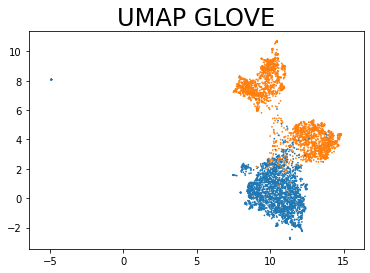

In [53]:
reducer = umap.UMAP(random_state=42)
#x_train_ss = StandardScaler().fit_transform(x_train_embeddings_vec)
embedding_glove=reducer.fit_transform(normalize(x_train_embeddings_vec))
plt.scatter(
    embedding_glove[:, 0],
    embedding_glove[:, 1],
    c=[sns.color_palette()[x] for x in Y_training_label],s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP GLOVE', fontsize=24)

Text(0.5, 1.0, 'UMAP Random Vector')

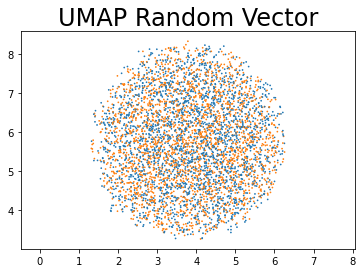

In [33]:
random_vec_reducer = umap.UMAP(random_state=42)
x_train_200_arr=np.array(x_train_200)
rand_vec=np.random.rand(x_train_200_arr.shape[0],x_train_200_arr.shape[1])
rand_vec_ss = StandardScaler().fit_transform(normalize(rand_vec))
embedding_randvec = random_vec_reducer.fit_transform(rand_vec_ss)
plt.scatter(
    embedding_randvec[:, 0],
    embedding_randvec[:, 1],
    c=[sns.color_palette()[x] for x in Y_training_label],s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP Random Vector', fontsize=24)

Q12

In [79]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = 42)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = 42)
count_vect3=CountVectorizer(analyzer=stem_rmv_punc,min_df=3, stop_words='english')
X_train_count = count_vect3.fit_transform(train_dataset.data)
X_test_count = count_vect3.transform(test_dataset.data)

accuracy: 0.792332268370607
recall: 0.7913861100015085
precision: 0.7911918907213757
f1_score: 0.7905663145936122


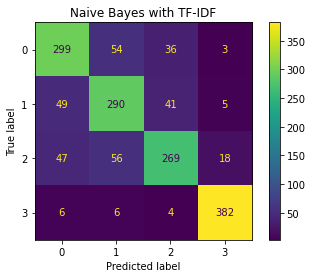

In [80]:
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_count).toarray()
X_test_tfidf = tfidf.transform(X_test_count).toarray()
gauss_nb = GaussianNB()
gauss_nb.fit(X_train_tfidf, train_dataset.target)
Y_test_pred_nb = gauss_nb.predict(X_test_tfidf)

print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_nb))
print('recall:', recall_score(test_dataset.target, Y_test_pred_nb, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_nb, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_nb, average='macro'))

plot_confusion_matrix(gauss_nb, X_test_tfidf, test_dataset.target,values_format='d')
plt.title('Naive Bayes with TF-IDF')
plt.show()

accuracy: 0.6856230031948882
recall: 0.683478046839497
precision: 0.6986852449776154
f1_score: 0.6789939046799781


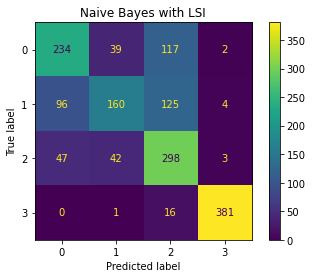

In [81]:
lsi = TruncatedSVD(n_components = 50, random_state=42)
X_train_LSI = lsi.fit_transform(X_train_tfidf)
X_test_LSI = lsi.transform(X_test_tfidf)
gauss_nb = GaussianNB()
gauss_nb.fit(X_train_LSI, train_dataset.target)
Y_test_pred_nb = gauss_nb.predict(X_test_LSI)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_nb))
print('recall:', recall_score(test_dataset.target, Y_test_pred_nb, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_nb, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_nb, average='macro'))
plot_confusion_matrix(gauss_nb, X_test_LSI, test_dataset.target, values_format='d')
plt.title('Naive Bayes with LSI')
plt.show()

accuracy: 0.734185303514377
recall: 0.7321590185956661
precision: 0.741831899794883
f1_score: 0.7282256789619082


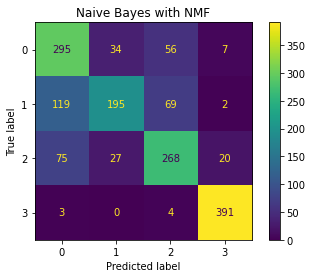

In [82]:
nmf = NMF(n_components=50, random_state=42)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)
gauss_nb = GaussianNB()
gauss_nb.fit(X_train_NMF, train_dataset.target)
Y_test_pred_nb = gauss_nb.predict(X_test_NMF)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_nb))
print('recall:', recall_score(test_dataset.target, Y_test_pred_nb, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_nb, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_nb, average='macro'))
plot_confusion_matrix(gauss_nb, X_test_NMF, test_dataset.target, values_format='d')
plt.title('Naive Bayes with NMF')
plt.show()

accuracy: 0.9118210862619809
recall: 0.9113960563843909
precision: 0.9127622115244837
f1_score: 0.911777348333841


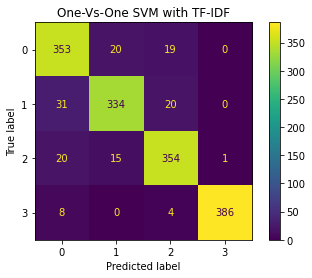

In [83]:
svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
svm_ovo.fit(X_train_tfidf, train_dataset.target)
Y_test_pred_ovo = svm_ovo.predict(X_test_tfidf)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_ovo))
print('recall:', recall_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
plot_confusion_matrix(svm_ovo, X_test_tfidf, test_dataset.target, values_format='d')
plt.title('One-Vs-One SVM with TF-IDF')
plt.show()

accuracy: 0.8702875399361022
recall: 0.8695624951143617
precision: 0.8727150663245526
f1_score: 0.8703345477527675


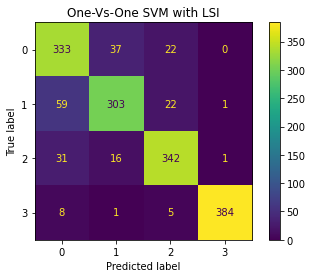

In [84]:
svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
svm_ovo.fit(X_train_LSI, train_dataset.target)
Y_test_pred_ovo = svm_ovo.predict(X_test_LSI)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_ovo))
print('recall:', recall_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
plot_confusion_matrix(svm_ovo, X_test_LSI, test_dataset.target, values_format='d')
plt.title('One-Vs-One SVM with LSI')
plt.show()

accuracy: 0.7111821086261981
recall: 0.7096660891752421
precision: 0.7700022409431042
f1_score: 0.7093306446006076


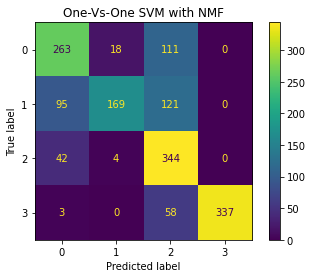

In [85]:
svm_ovo = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
svm_ovo.fit(X_train_NMF, train_dataset.target)
Y_test_pred_ovo = svm_ovo.predict(X_test_NMF)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_ovo))
print('recall:', recall_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_ovo, average='macro'))
plot_confusion_matrix(svm_ovo, X_test_NMF, test_dataset.target, values_format='d')
plt.title('One-Vs-One SVM with NMF')
plt.show()

accuracy: 0.9118210862619809
recall: 0.9113936748224257
precision: 0.9119193509679407
f1_score: 0.9115546140547703


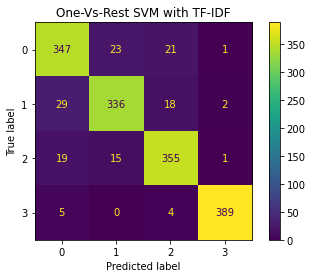

In [86]:
svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
svm_ovr.fit(X_train_tfidf, train_dataset.target)
Y_test_pred_ovr = svm_ovr.predict(X_test_tfidf)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_ovr))
print('recall:', recall_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
plot_confusion_matrix(svm_ovr, X_test_tfidf, test_dataset.target, values_format='d')
plt.title('One-Vs-Rest SVM with TF-IDF')
plt.show()

accuracy: 0.8722044728434505
recall: 0.8715540471732144
precision: 0.8709318379018006
f1_score: 0.8708051583479878


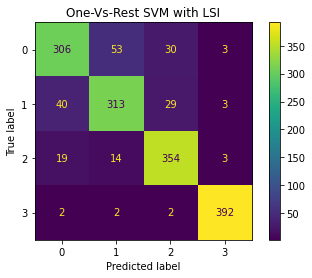

In [87]:
svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
svm_ovr.fit(X_train_LSI, train_dataset.target)
Y_test_pred_ovr = svm_ovr.predict(X_test_LSI)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_ovr))
print('recall:', recall_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
plot_confusion_matrix(svm_ovr, X_test_LSI, test_dataset.target, values_format='d')
plt.title('One-Vs-Rest SVM with LSI')
plt.show()

accuracy: 0.7827476038338658
recall: 0.7813249280630832
precision: 0.7792029860787977
f1_score: 0.7770754652435687


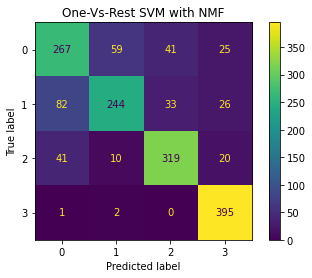

In [88]:
svm_ovr = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
svm_ovr.fit(X_train_NMF, train_dataset.target)
Y_test_pred_ovr = svm_ovr.predict(X_test_NMF)
print('accuracy:', accuracy_score(test_dataset.target, Y_test_pred_ovr))
print('recall:', recall_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
print('precision:', precision_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
print('f1_score:', f1_score(test_dataset.target, Y_test_pred_ovr, average='macro'))
plot_confusion_matrix(svm_ovr, X_test_NMF, test_dataset.target, values_format='d')
plt.title('One-Vs-Rest SVM with NMF')
plt.show()